# Programming for Data Science

## Linear Models

### Logistic Regression

#### Amir Hossein Akhavan Rahanama

In this notebook, we implmenet our own Logistic Regression and compare it side by side with Scikit Learn's implementation:

In [39]:
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt
import model

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.datasets import make_moons
from sklearn.datasets import make_gaussian_quantiles
from matplotlib.colors import ListedColormap

In [12]:
np.random.seed(0)

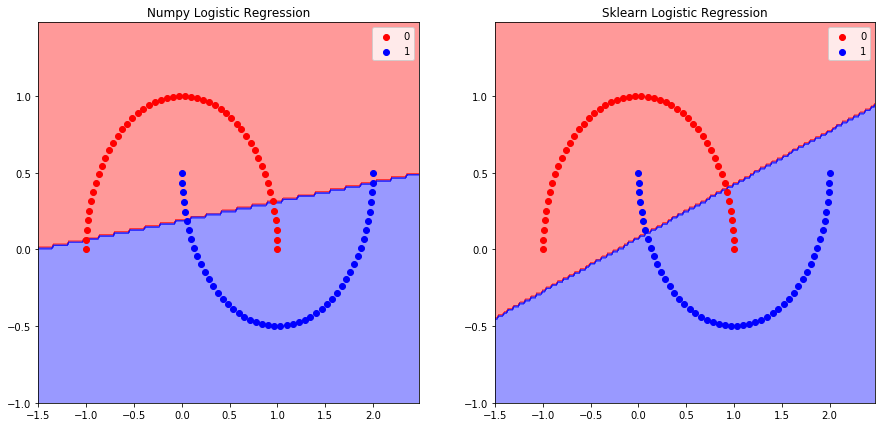

In [45]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

colors = {0: 'red', 1: 'blue'}

X, Y = make_moons(n_samples=100)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02

_w, _b, _w_trail_path, _b_trail_path = model.train_gd(X, Y, method='logistic', regularization_coeff=1)

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = model.logistic(np.c_[xx.ravel(), yy.ravel()], _w, _b)
Z = Z.reshape(xx.shape)

cm_bright = ListedColormap(['red', 'blue'])

ax[0].contourf(xx, yy, Z, alpha=0.4, cmap=cm_bright)
ax[0].set_title('Numpy Logistic Regression')

for c in colors:
    idx = np.where(Y==c)[0]
    ax[0].scatter(X[idx, 0], X[idx, 1], label=c, c=colors[c], cmap=cm_bright)

ax[0].set_xlim(xx.min(), xx.max())
ax[0].set_ylim(yy.min(), yy.max())

ax[0].legend()

clf = LogisticRegression(random_state=0, solver='lbfgs').fit(X, Y)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

ax[1].contourf(xx, yy, Z, alpha=0.4, cmap=cm_bright)
for c in colors:
    idx = np.where(Y==c)[0]
    ax[1].scatter(X[idx, 0], X[idx, 1], c=colors[c], label=c, cmap=cm_bright)

ax[1].set_xlim(xx.min(), xx.max())
ax[1].set_ylim(yy.min(), yy.max())
ax[1].set_title('Sklearn Logistic Regression')

ax[1].legend()
plt.savefig('logistic_regression.png', format='png', dpi=600)

plt.show()

As you can see, the two implementation slightly differ in implementation, however this is due to the fact that Sklearn's implementation uses second order methods and there is no defualt gradient descent implementation and unfortuantely we do not have time to cover second order methods in our course.